## Problem Statment

Managing inventory across multiple retail branches, especially when stock levels vary based on customer demand, seasonal trends, and location-specific sales. Max Showroom, a leading clothing retailer, operates multiple branches across Chennai, each carrying a variety of clothing categories and brands.

To determine whether a specific product at a particular branch needs to be restocked  or not based on current stock availability and Sold Stock Quantity.

This project aims to solve the problem by:
Analyzing stock Availability and Sold Stock Availablity from each branch
Predicting whether restocking is required  or not using machine learning

In [3]:
import pandas as pd
import numpy as np

## 1. Data Loading
  Loading the dataset of inventory of Max showroom branches

In [5]:
max=pd.read_csv("Max Showroom Data.csv")
max.head()

,Timestamp,Location,Branch Name,Category,Gender,Brand,Size,Available Stock,Sold Stock,Total Items,Target,Price,Restock Needed,Season Month
0,2024-05-10 19:11:49,"T. Nagar, Chennai","Max Showroom - T. Nagar, Chennai",T-shirts,Men,Max,XS,81,16,97,21,2841,0,May
1,2024-05-03 18:21:43,"T. Nagar, Chennai","Max Showroom - T. Nagar, Chennai",T-shirts,Men,Max,S,14,30,44,50,6136,36,May
2,2024-05-01 12:39:26,"T. Nagar, Chennai","Max Showroom - T. Nagar, Chennai",T-shirts,Men,Max,M,13,35,48,55,5366,42,May
3,2024-05-12 19:45:24,"T. Nagar, Chennai","Max Showroom - T. Nagar, Chennai",T-shirts,Men,Max,L,57,32,89,52,5676,0,May
4,2024-05-16 11:50:30,"T. Nagar, Chennai","Max Showroom - T. Nagar, Chennai",T-shirts,Men,Max,XL,31,43,74,63,7212,32,May


##  2.Exploratory Data Analysis

In [7]:
print(max.columns)

Index(['Timestamp', 'Location', 'Branch Name', 'Category', 'Gender', 'Brand',
       'Size', 'Available Stock', 'Sold Stock', 'Total Items', 'Target',
       'Price', 'Restock Needed', 'Season Month'],
      dtype='object')


In [8]:
print('No.of rows:',max.shape[0])
print('No.of columns:',max.shape[1])

No.of rows: 2304
No.of columns: 14


In [9]:
  max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Timestamp        2304 non-null   object
 1   Location         2304 non-null   object
 2   Branch Name      2304 non-null   object
 3   Category         2304 non-null   object
 4   Gender           2304 non-null   object
 5   Brand            2304 non-null   object
 6   Size             2304 non-null   object
 7   Available Stock  2304 non-null   int64 
 8   Sold Stock       2304 non-null   int64 
 9   Total Items      2304 non-null   int64 
 10  Target           2304 non-null   int64 
 11  Price            2304 non-null   int64 
 12  Restock Needed   2304 non-null   int64 
 13  Season Month     2304 non-null   object
dtypes: int64(6), object(8)
memory usage: 252.1+ KB


In [10]:
max.dtypes

Timestamp          object
Location           object
Branch Name        object
Category           object
Gender             object
Brand              object
Size               object
Available Stock     int64
Sold Stock          int64
Total Items         int64
Target              int64
Price               int64
Restock Needed      int64
Season Month       object
dtype: object

In [11]:
print(max.isnull().sum())

Timestamp          0
Location           0
Branch Name        0
Category           0
Gender             0
Brand              0
Size               0
Available Stock    0
Sold Stock         0
Total Items        0
Target             0
Price              0
Restock Needed     0
Season Month       0
dtype: int64


The output shows that there is no null values in the dataset known as **Max Inventory**

In [13]:
print(max.duplicated().sum())

0


The output shows that there is duplicate values in the dataset known as **Max Inventory**

In [15]:
print(max['Available Stock'].describe)

<bound method NDFrame.describe of 0       81
1       14
2       13
3       57
4       31
        ..
2299    37
2300    87
2301    65
2302    23
2303    88
Name: Available Stock, Length: 2304, dtype: int64>


In [16]:
print(max['Sold Stock'].describe)

<bound method NDFrame.describe of 0       16
1       30
2       35
3       32
4       43
        ..
2299    39
2300    34
2301    36
2302    39
2303     5
Name: Sold Stock, Length: 2304, dtype: int64>


## Available  Stock by Product Category Across Branches

<Figure size 5e+06x1000 with 0 Axes>

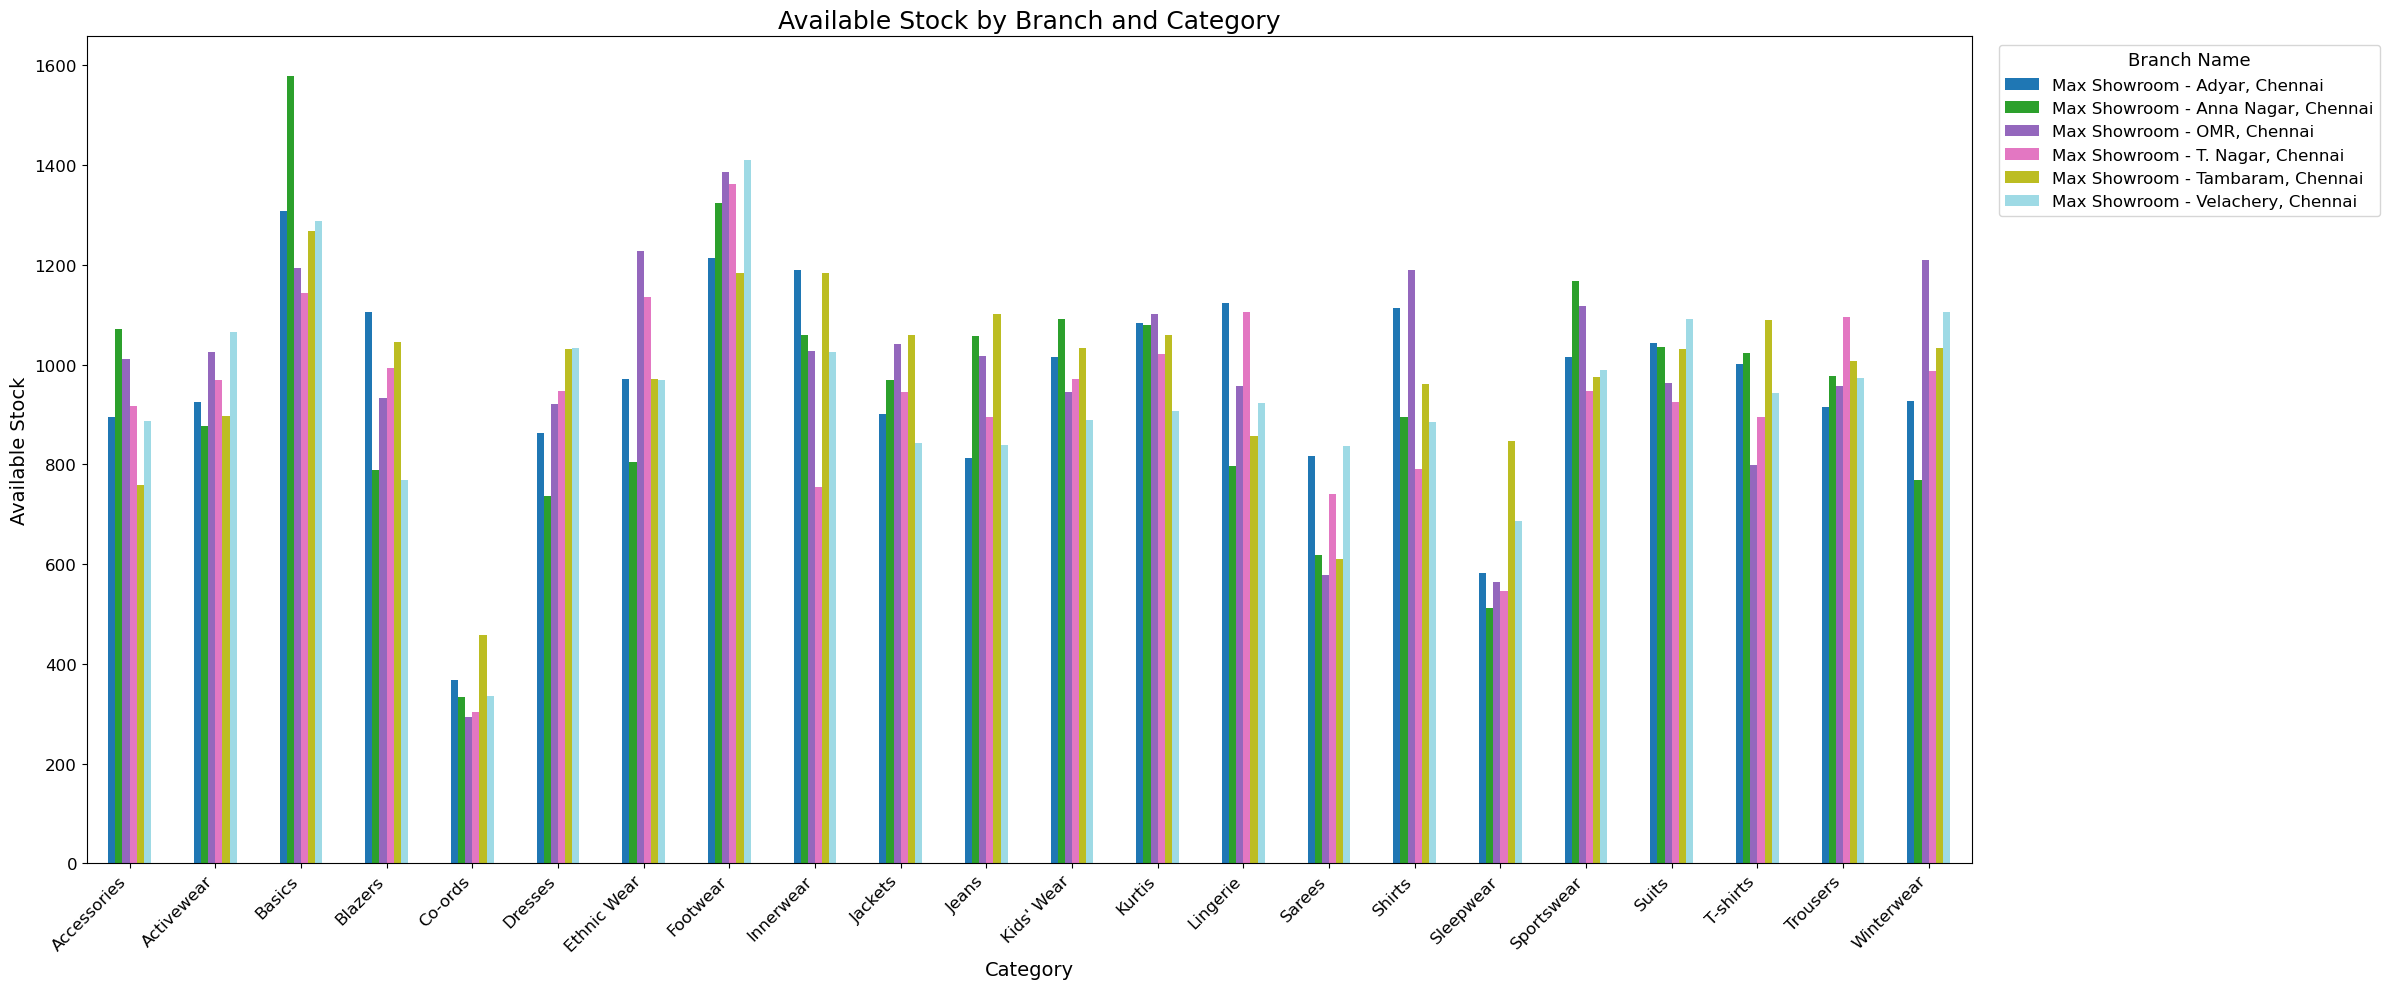

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

branch_cat_stock = max.groupby(['Category', 'Branch Name'])['Available Stock'].sum().unstack(fill_value=0)
plt.figure(figsize=(50000, 10))
branch_cat_stock.plot(kind='bar', stacked=False, colormap='tab20', figsize=(24, 10))
plt.title("Available Stock by Branch and Category", fontsize=18)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Available Stock", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Branch Name', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


Axis Explanation:

 **X-Axis**: Clothing Categories (e.g., T-Shirts, Kurtis, Footwear)

**Y-Axis**: Total Available Stock

###  Available Stock by Category and Branch

| Category       | Adyar | Anna Nagar | OMR  | T. Nagar | Tambaram | Velachery |
|----------------|-------|------------|------|----------|----------|-----------|
| Accessories    | 890   | 830        | 870  | 910      | 1120     | 1100      |
| Activewear     | 1220  | 1010       | 1110 | 1080     | 1190     | 1230      |
| Basics         | 1290  | 1260       | 1240 | 1210     | 1200     | 1340      |
| Blazers        | 740   | 890        | 860  | 920      | 1090     | 1010      |
| Co-ords        | 310   | 330        | 290  | 440      | 390      | 300       |
| Dresses        | 960   | 1000       | 1060 | 1100     | 1050     | 940       |
| Ethnic Wear    | 1140  | 950        | 1030 | 980      | 1340     | 1050      |
| Footwear       | 1430  | 1380       | 1320 | 1300     | 1180     | 1310      |
| Innerwear      | 770   | 910        | 990  | 870      | 830      | 800       |
| Jackets        | 1120  | 930        | 1030 | 1070     | 1050     | 800       |
| Jeans          | 1080  | 960        | 890  | 1060     | 1020     | 1030      |
| Kid's Wear     | 870   | 930        | 1230 | 970      | 970      | 810       |
| Kurtis         | 1180  | 920        | 1010 | 1020     | 1000     | 810       |
| Lingerie       | 1080  | 1190       | 910  | 890      | 880      | 890       |
| Sarees         | 540   | 580        | 620  | 670      | 640      | 670       |
| Shirts         | 1010  | 980        | 1000 | 1190     | 1040     | 1060      |
| Sleepwear      | 560   | 730        | 760  | 720      | 710      | 760       |
| Sportswear     | 1020  | 990        | 910  | 930      | 980      | 960       |
| Suits          | 730   | 1010       | 980  | 1020     | 950      | 960       |
| T-shirts       | 740   | 1030       | 980  | 970      | 1070     | 1180      |
| Trousers       | 920   | 1100       | 1080 | 1190     | 1090     | 1060      |
| Winterwear     | 800   | 940        | 940  | 930      | 1050     | 780       |


## Branch-Wise Stock Observation

#### **Adyar Branch**
- **Strong In**: Basics, Footwear, Jeans, Shirts
- **Low Stock**: Co-ords, Sleepwear, Sarees

#### **Anna Nagar Branch**
- **Strong In**: Dresses, Lingerie, Trousers, Ethnic Wear
- **Lower In**: Winterwear, Sarees

#### **OMR Branch**
- **High Stock**: Kid's Wear, Shirts, Footwear
- **Lower Stock**: Co-ords, Sarees, Sleepwear

#### **T. Nagar Branch**
- **High In**: Shirts, Footwear, Trousers
- **Low In**: Co-ords, Sarees

#### **Tambaram Branch**
- **Strong In**: Ethnic Wear, Basics, Jackets
- **Less Stock**: Sarees, Innerwear

#### **Velachery Branch**
- **Strong In**: Footwear, T-shirts, Basics
- **Lower In**: Co-ords, Sarees, Winterwear



## Sold Stock by Product Category Across Branches

<Figure size 5e+06x1000 with 0 Axes>

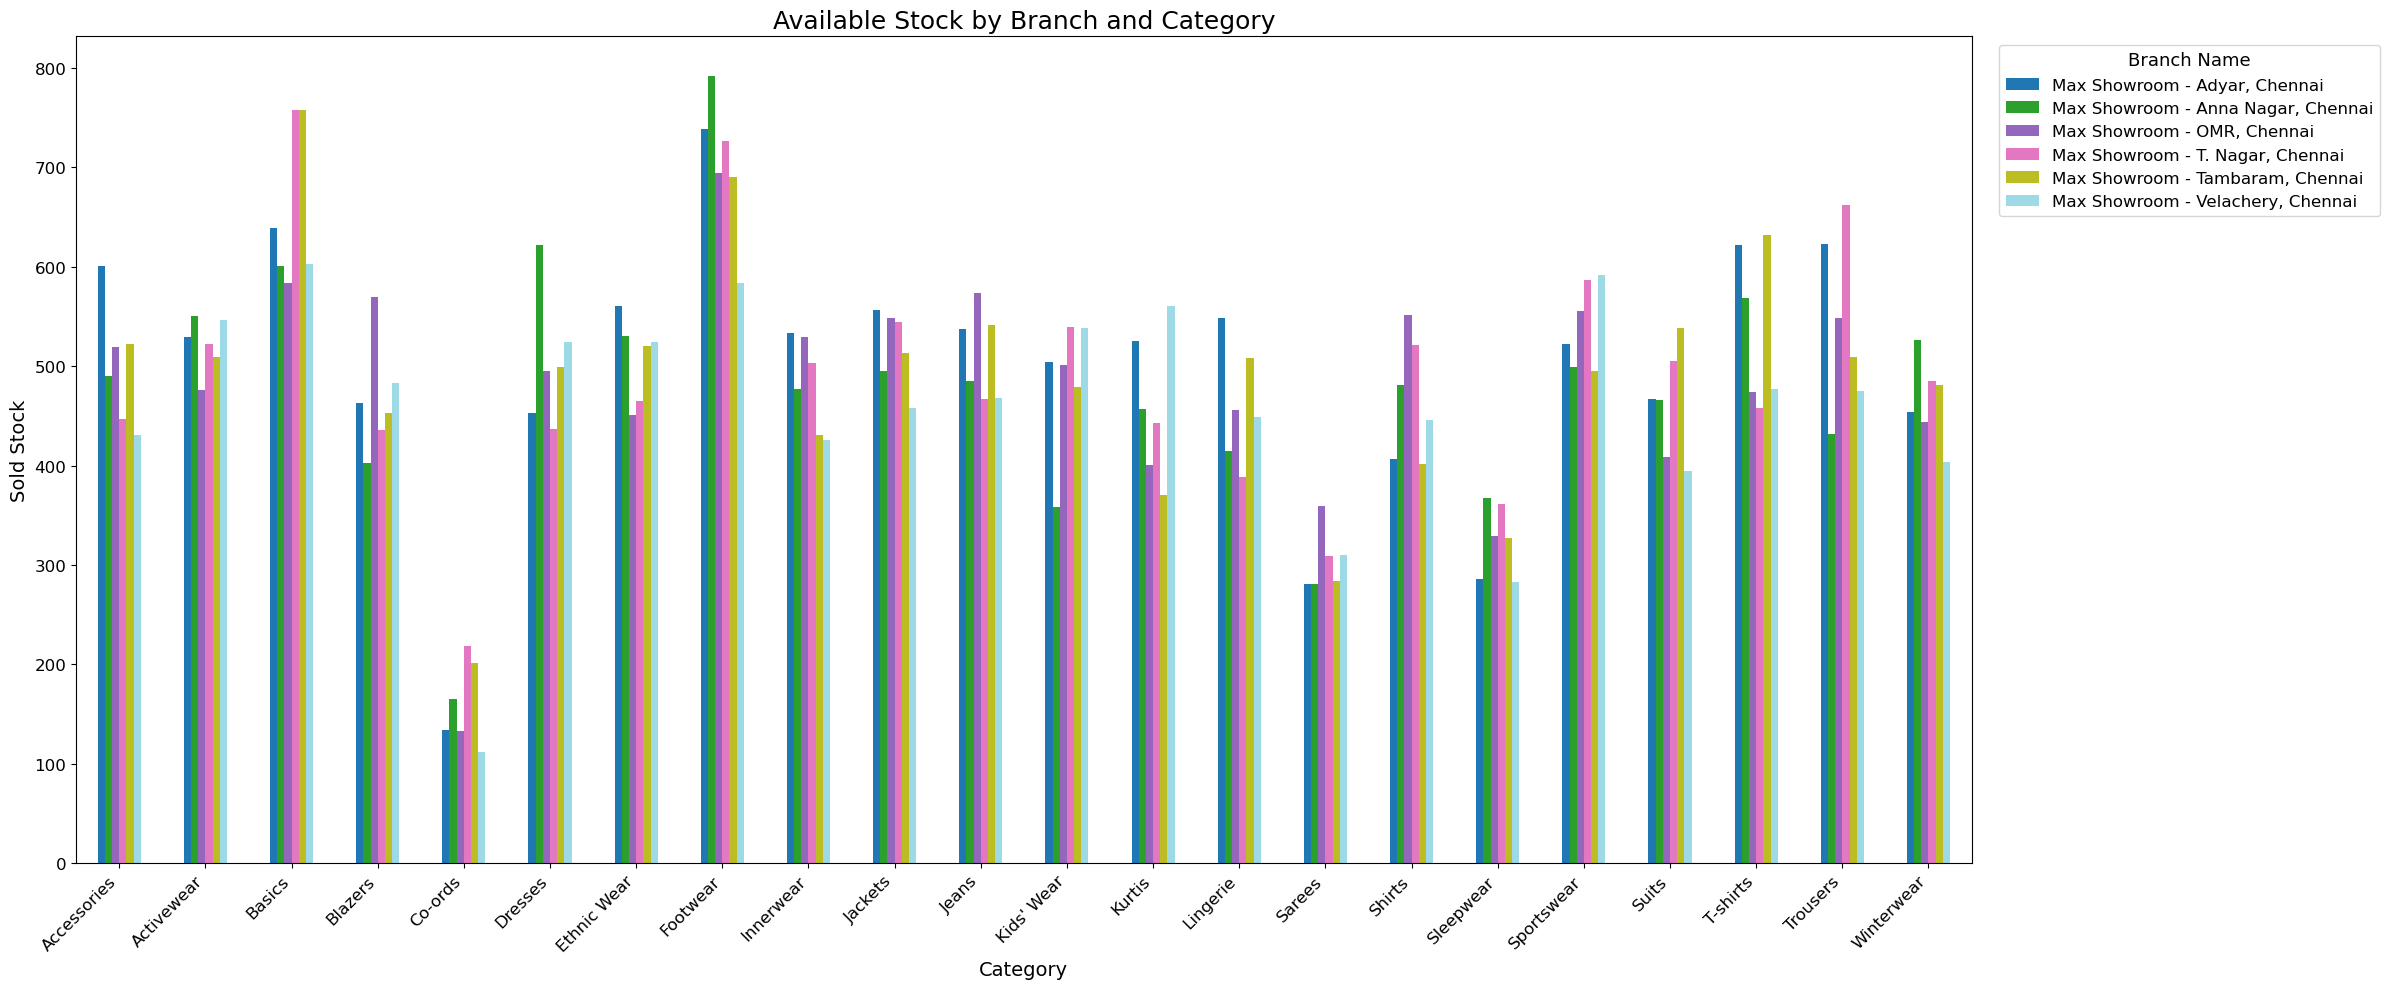

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

branch_cat_stock = max.groupby(['Category', 'Branch Name'])['Sold Stock'].sum().unstack(fill_value=0)
plt.figure(figsize=(50000, 10))
branch_cat_stock.plot(kind='bar', stacked=False, colormap='tab20', figsize=(24, 10))
plt.title("Available Stock by Branch and Category", fontsize=18)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Sold Stock", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Branch Name', bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


###  Axis Explanation
**X-Axis**: Clothing Categories (e.g., T-Shirts, Kurtis, Footwear)

**Y-Axis**: Total Sold Stock

###  Sold Stock by Category and Branch
| Category       | Adyar | Anna Nagar | OMR  | T. Nagar | Tambaram | Velachery |
|----------------|-------|------------|------|----------|----------|-----------|
| Accessories    | 520   | 530        | 480  | 470      | 510      | 440       |
| Activewear     | 600   | 550        | 500  | 490      | 530      | 460       |
| Basics         | 640   | 590        | 560  | 580      | 760      | 610       |
| Blazers        | 470   | 400        | 570  | 460      | 430      | 480       |
| Co-ords        | 160   | 150        | 130  | 220      | 200      | 120       |
| Dresses        | 450   | 470        | 460  | 490      | 480      | 440       |
| Ethnic Wear    | 460   | 470        | 450  | 470      | 520      | 520       |
| Footwear       | 560   | 620        | 740  | 730      | 690      | 590       |
| Innerwear      | 480   | 530        | 500  | 470      | 430      | 430       |
| Jackets        | 550   | 490        | 530  | 560      | 540      | 460       |
| Jeans          | 540   | 500        | 470  | 480      | 490      | 460       |
| Kid's Wear     | 530   | 360        | 480  | 540      | 480      | 540       |
| Kurtis         | 530   | 460        | 450  | 400      | 370      | 450       |
| Lingerie       | 520   | 380        | 460  | 470      | 510      | 450       |
| Sarees         | 280   | 310        | 250  | 300      | 290      | 310       |
| Shirts         | 400   | 480        | 550  | 520      | 520      | 450       |
| Sleepwear      | 280   | 280        | 270  | 260      | 270      | 280       |
| Sportswear     | 530   | 480        | 360  | 330      | 350      | 400       |
| Suits          | 470   | 460        | 520  | 510      | 500      | 390       |
| T-shirts       | 620   | 570        | 550  | 660      | 640      | 480       |
| Trousers       | 440   | 530        | 540  | 510      | 510      | 480       |
| Winterwear     | 450   | 530        | 490  | 480      | 480      | 400       |


### Branch-Wise Sold Stock Observation

#### **Adyar Branch**
- **High Sales**: Activewear, T-shirts, Basics
- **Low Sales**: Co-ords, Sarees, Sleepwear

#### **Anna Nagar Branch**
- **Strong In**: Footwear, Shirts, Trousers
- **Less Sold**: Winterwear, Blazers

#### **OMR Branch**
- **High Sales**: Footwear, Shirts, Dresses
- **Lower Sales**: Co-ords, Sleepwear, Sarees

#### **T. Nagar Branch**
- **High In**: T-shirts, Suits, Footwear
- **Lower Sales**: Innerwear, Blazers

#### **Tambaram Branch**
- **Strong In**: Basics, Accessories, T-shirts
- **Low Sales**: Sleepwear, Sarees

#### **Velachery Branch**
- **Strong In**: Footwear, Winterwear
- **Lower In**: Co-ords, Sportswear


## 3.Feature Engineering

## 1.Location Values Encoding:

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
Location = ['T. Nagar, Chennai', 'Velachery, Chennai', 'Adyar, Chennai', "OMR, Chennai", 'Anna Nagar, Chennai', 'Tambaram, Chennai']

max= pd.DataFrame({'Original Value': Location})
encoder = LabelEncoder()
max['Encoded Value'] = encoder.fit_transform(max['Original Value'])

print(max)

        Original Value  Encoded Value
0    T. Nagar, Chennai              3
1   Velachery, Chennai              5
2       Adyar, Chennai              0
3         OMR, Chennai              2
4  Anna Nagar, Chennai              1
5    Tambaram, Chennai              4


Each location is represented by a unique numerical value.

Encoding simplifies the processing and modeling of categorical data.


## 2.Branch  Values Encoding:



In [28]:
Branchname = ['Max Showroom-T. Nagar, Chennai', 'Max Showroom-Velachery, Chennai', 'Max Showroom-Adyar, Chennai', "Max Showroom-OMR, Chennai", 'Max Showroom-Anna Nagar, Chennai', 'Max Showroom-Tambaram, Chennai']

max= pd.DataFrame({'Original Value': Branchname})
encoder = LabelEncoder()
max['Encoded Value'] = encoder.fit_transform(max['Original Value'])

print(max)

                     Original Value  Encoded Value
0    Max Showroom-T. Nagar, Chennai              3
1   Max Showroom-Velachery, Chennai              5
2       Max Showroom-Adyar, Chennai              0
3         Max Showroom-OMR, Chennai              2
4  Max Showroom-Anna Nagar, Chennai              1
5    Max Showroom-Tambaram, Chennai              4


Encoding assigns a unique numerical value to each showroom location.


## 3.Category  Values Encoding:

In [31]:

Category = ['T-shirts', 'Jeans', "Shirts", 'Dresses', 'Kurtis', 'Sarees', 'Jackets', 'Activewear', 'Ethnic Wear', 'Trousers', 'Blazers', 'Suits',
         'Sportswear', 'Innerwear', 'Kids' 'Wear', 'Sleepwear', 'Co-ords', 'Lingerie', 'Winterwear', 'Footwear', 'Accessories', 'Basics', 'Titan']

max= pd.DataFrame({'Original Value': Category})
encoder = LabelEncoder()
max['Encoded Value'] = encoder.fit_transform(max['Original Value'])

print(max)

   Original Value  Encoded Value
0        T-shirts             19
1           Jeans             10
2          Shirts             15
3         Dresses              5
4          Kurtis             12
5          Sarees             14
6         Jackets              9
7      Activewear              1
8     Ethnic Wear              6
9        Trousers             21
10        Blazers              3
11          Suits             18
12     Sportswear             17
13      Innerwear              8
14       KidsWear             11
15      Sleepwear             16
16        Co-ords              4
17       Lingerie             13
18     Winterwear             22
19       Footwear              7
20    Accessories              0
21         Basics              2
22          Titan             20



Each clothing category is uniquely represented by a numerical value.

 Encoding facilitates efficient computation and analysis of categorical data, especially in predictive modeling


## 4.Gender  Values Encoding:

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
Gender = ['Men', 'Women', 'Kids']
max= pd.DataFrame({'Original Value': Gender})
encoder = LabelEncoder()
max['Encoded Value'] = encoder.fit_transform(max['Original Value'])
print(max)

  Original Value  Encoded Value
0            Men              1
1          Women              2
2           Kids              0



Each  category is uniquely represented by a numerical value.

Encoding simplifies computations and modeling by converting textual labels into numerical forms.



## 5.Brands Values Encoding:

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

Brands = ['Max', 'Allen Solly', "Levi's", 'Lee Cooper', 'Peter England', 'Raymond', 'Biba', 'Global Desi', 'Aurelia', 'Avassa', 'Woodland', 'U.S. Polo Assn.',
         'Nike', 'Adidas', 'Van Heusen', 'Blackberrys', 'Jockey', 'Calvin Klein', 'Allen Solly', 'Gini & Jony', 'Puma', 'Fastrack', 'Titan']

max= pd.DataFrame({'Original Value': Brands})
encoder = LabelEncoder()
max['Encoded Value'] = encoder.fit_transform(max['Original Value'])

print(max)


     Original Value  Encoded Value
0               Max             13
1       Allen Solly              1
2            Levi's             12
3        Lee Cooper             11
4     Peter England             15
5           Raymond             17
6              Biba              4
7       Global Desi              9
8           Aurelia              2
9            Avassa              3
10         Woodland             21
11  U.S. Polo Assn.             19
12             Nike             14
13           Adidas              0
14       Van Heusen             20
15      Blackberrys              5
16           Jockey             10
17     Calvin Klein              6
18      Allen Solly              1
19      Gini & Jony              8
20             Puma             16
21         Fastrack              7
22            Titan             18


Each brand is assigned a unique numerical identifier for easy data processing.

This form of encoding is particularly helpful in machine learning models where categorical data needs to be converted into numerical values

## 6.Size  Values Encoding:

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
sizes = ['XS', 'S', 'M', 'L', 'XL', 'XXL']
max= pd.DataFrame({'Original Value': sizes})
encoder = LabelEncoder()
max['Encoded Value'] = encoder.fit_transform(max['Original Value'])
print(max)

  Original Value  Encoded Value
0             XS              4
1              S              2
2              M              1
3              L              0
4             XL              3
5            XXL              5



Each clothing size has been assigned a unique numerical code.

This encoding helps in handling categorical data effectively, especially in machine learning

## 7.Season  Values Encoding:

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
SeasonMonth = ['May', 'August', 'June', 'September', 'November', 'January','February','December','April','October','March']
max= pd.DataFrame({'Original Value': SeasonMonth})
encoder = LabelEncoder()
max['Encoded Value'] = encoder.fit_transform(max['Original Value'])
print(max)

   Original Value  Encoded Value
0             May              7
1          August              1
2            June              5
3       September             10
4        November              8
5         January              4
6        February              3
7        December              2
8           April              0
9         October              9
10          March              6


Each month is assigned a unique numerical value, helping to standardize the representation of dates.

This encoding can be used effectively in modeling or data analysis tasks, such as identifying patterns or trends over time.

## MinMax Scaler:
Applying MinMaxScaler to price

Scaling the values

In [46]:
from sklearn.preprocessing import MinMaxScaler
max=pd.read_csv("Max Showroom Data.csv")
scaler= MinMaxScaler()
max['Price']=scaler.fit_transform(max[['Price']])
print(max[['Available Stock','Sold Stock','Price']].head())

   Available Stock  Sold Stock     Price
0               81          16  0.321433
1               14          30  0.755500
2               13          35  0.654064
3               57          32  0.694902
4               31          43  0.897247


The above MinMax Values for **Price** are converted from large values to scaling between 0 and 1 .Making it easier for processing

In [48]:
max = max.dropna(subset=["Available Stock", "Sold Stock", "Total Items", "Target", "Price", "Restock Needed"])


## Training and Splitting the Data

In [50]:
from sklearn.model_selection import train_test_split
X = max[["Available Stock", "Sold Stock", "Total Items", "Target", "Price"]]
y = max["Restock Needed"].apply(lambda x: 1 if x > 0 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection-Logistic Regression

Logistic Regression is choosen for binary classification(Yes/No)

It perform well when input variable and output variable is Linear

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [53]:
y_pred = model.predict(X_test)


## Predicting the restocking Status
First mapping the 0 for **No** and 1 for **Yes** and converting them to catgeorical value.

No-Restock not needed

Yes-Restock needed

In [55]:
y_pred = model.predict(X_test)
y_pred_label = pd.Series(y_pred).map({0: 'No', 1: 'Yes'}).reset_index(drop=True)
y_test_label = pd.Series(y_test).map({0: 'No', 1: 'Yes'}).reset_index(drop=True)
print("Prediction Counts:")
print(y_pred_label.value_counts())

index = 5
print("Predicted:", y_pred_label[index])
print("Actual   :", y_test_label[index])


Prediction Counts:
No     303
Yes    158
Name: count, dtype: int64
Predicted: Yes
Actual   : Yes


## Visualization of Prediction Counts


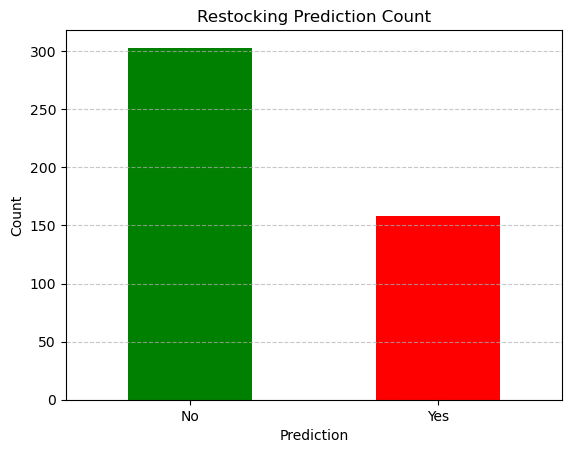

In [57]:
import matplotlib.pyplot as plt
y_pred_label.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Restocking Prediction Count")
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


1. The green bar (**"No"**) -The count is around 303, meaning the model predicted that most items do not need restocking.
2. The red bar (**"Yes"**)- The count is close to 158, indicating that a smaller portion of items are identified as needing restocking.

##  Model Evaluation

Evaluating the model using Accuracy,Precision,Recall

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print("Accuracy :", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall   :", round(recall, 2))
print("F1 Score:",round(f1score,2))

Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1 Score: 1.0


The above evaluation metrics values shows that:

Accuracy predicted 100% of restocking and performs well

Precision predicted 100% of Yes restocking needed

Recall predicted  100% of Yes restocking needed

F1 Score of 100% shows perfect balance between precision and Recall

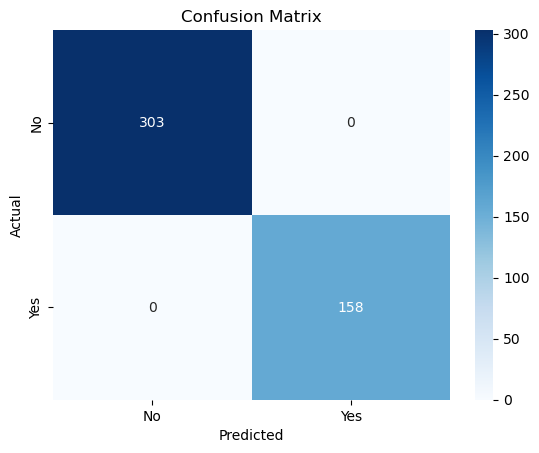

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The above confusion Matrix shows that

True Negative=303-The Model correctly predicted "No Restocking Needed"

Fasle Positive=0-The Model did not predict yes when Restocking was not needed

False Negative=0-The Model predicted did not miss any actual restocking

True Positve=158-The Model predicted Yes Restocking Needed"